<a href="https://colab.research.google.com/github/Nataliia-Shap/SofPR/blob/main/Mask_CNN_detectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
1.9.0+cu111 True


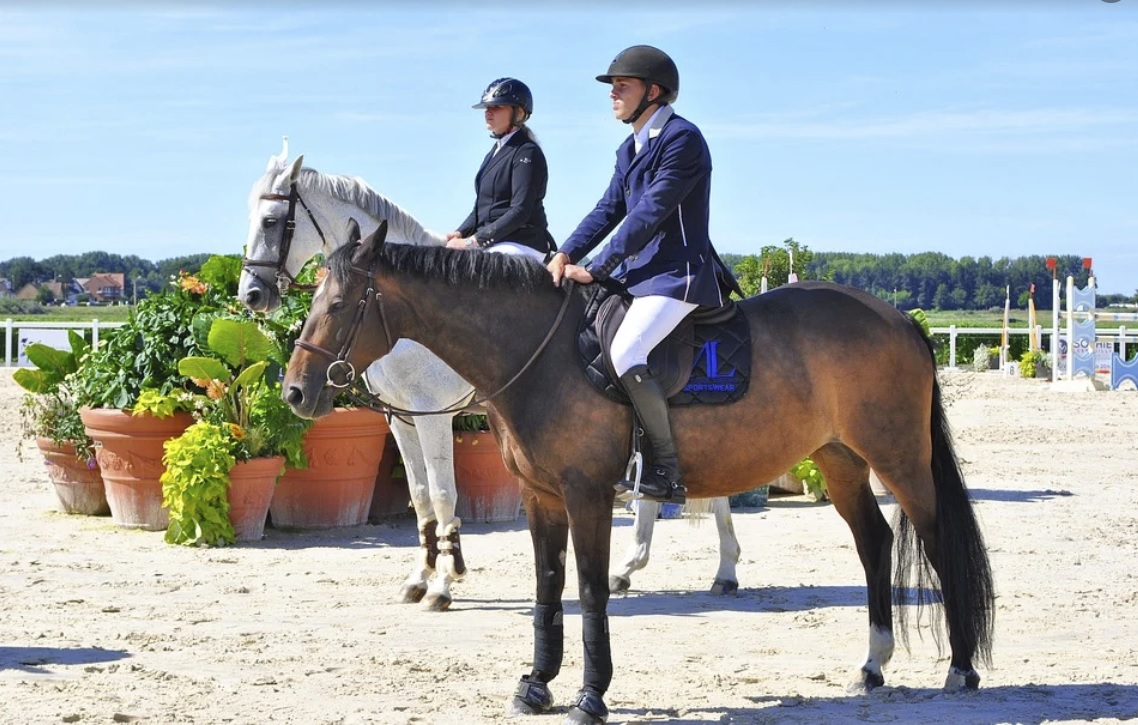

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


tensor([17,  0,  0, 58, 58, 58, 58, 58, 27, 17, 27, 17, 58, 58],
       device='cuda:0')
Boxes(tensor([[ 281.4336,  223.1694, 1004.1017,  692.4390],
        [ 549.0078,   43.0558,  739.2262,  511.0098],
        [ 444.4951,   77.2406,  555.5225,  265.7038],
        [  12.8837,  353.6424,  108.9827,  514.1725],
        [  66.9964,  286.4090,  220.3106,  528.0946],
        [ 199.3552,  355.6439,  311.1007,  539.3530],
        [ 157.7488,  422.5291,  242.3221,  546.9723],
        [ 273.0966,  391.8871,  393.6248,  532.6905],
        [ 625.9517,  134.7521,  636.1082,  168.1529],
        [ 241.6141,  147.4277,  455.4712,  317.5446],
        [ 623.3307,  136.5510,  636.9982,  184.8828],
        [ 265.1973,  183.0127,  515.5887,  596.5653],
        [ 147.8250,  381.8075,  282.7162,  545.1473],
        [  77.8616,  380.5428,  201.6127,  529.1011]], device='cuda:0'))


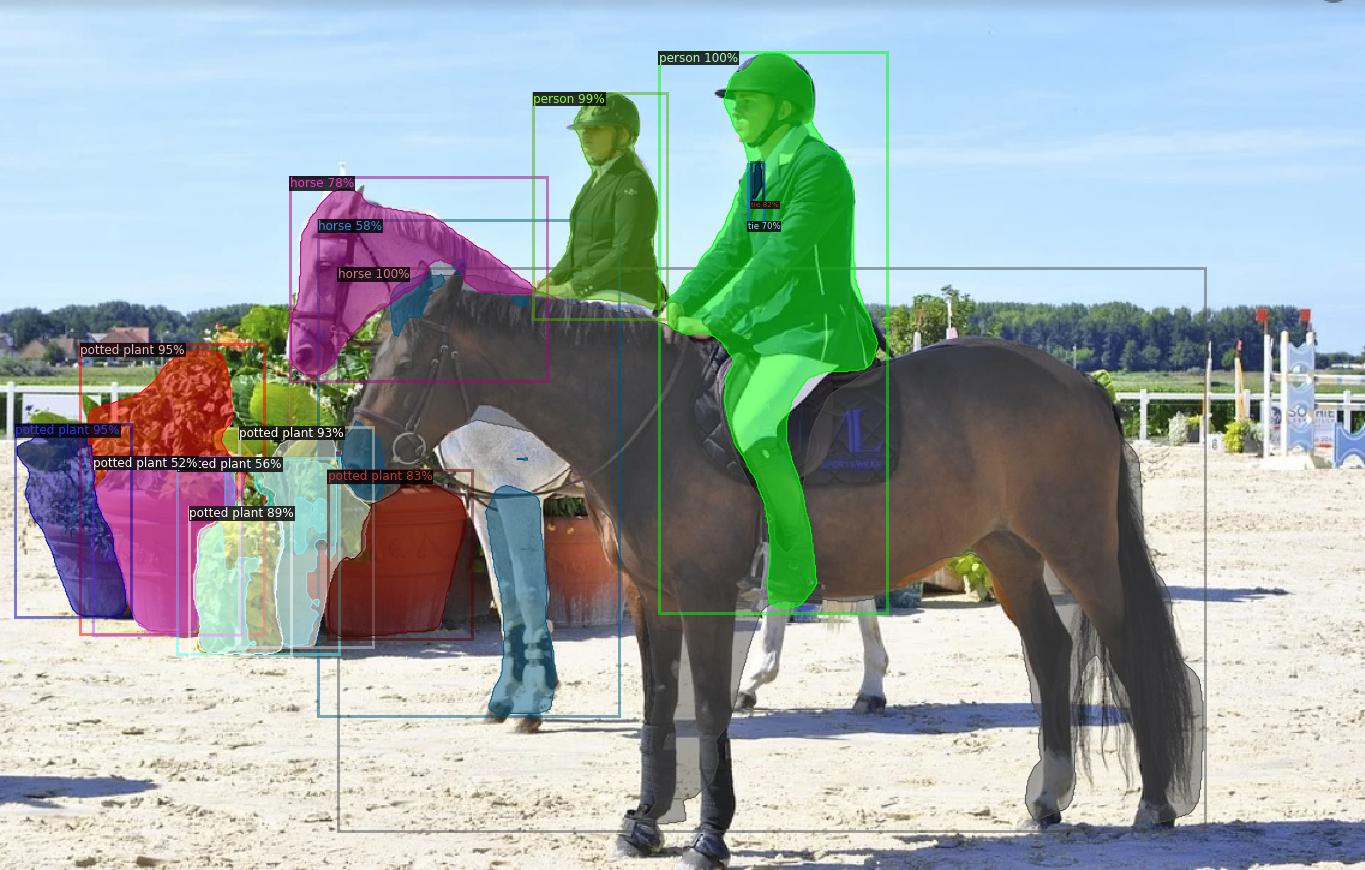

In [2]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
#im = cv2.imread("./input.jpg")
im = cv2.imread('/content/drive/My Drive/Colab Notebooks/horse.jpg')
cv2_imshow(im)
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


### Посилання на бібліотеку https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5